## Summer 2020, MSCA 31008 Data Mining Final Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler

## Exploratory Analysis and Correlation Analysis

In [2]:
df = pd.read_csv('data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
#Only numeric values
df_reduced = df.loc[:, ['Age', 'DailyRate', 'DistanceFromHome', 'Education',
                      'EnvironmentSatisfaction', 'HourlyRate', 
                      'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
                      'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
                      'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
                      'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                      'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                      'YearsWithCurrManager']]

In [4]:
def plot_pairgrid(df, list_of_features):
    apc = df[list_of_features]
    ax = sns.PairGrid(apc)
    ax = ax.map_diag(plt.hist)
    ax = ax.map_offdiag(plt.scatter)
    return ax

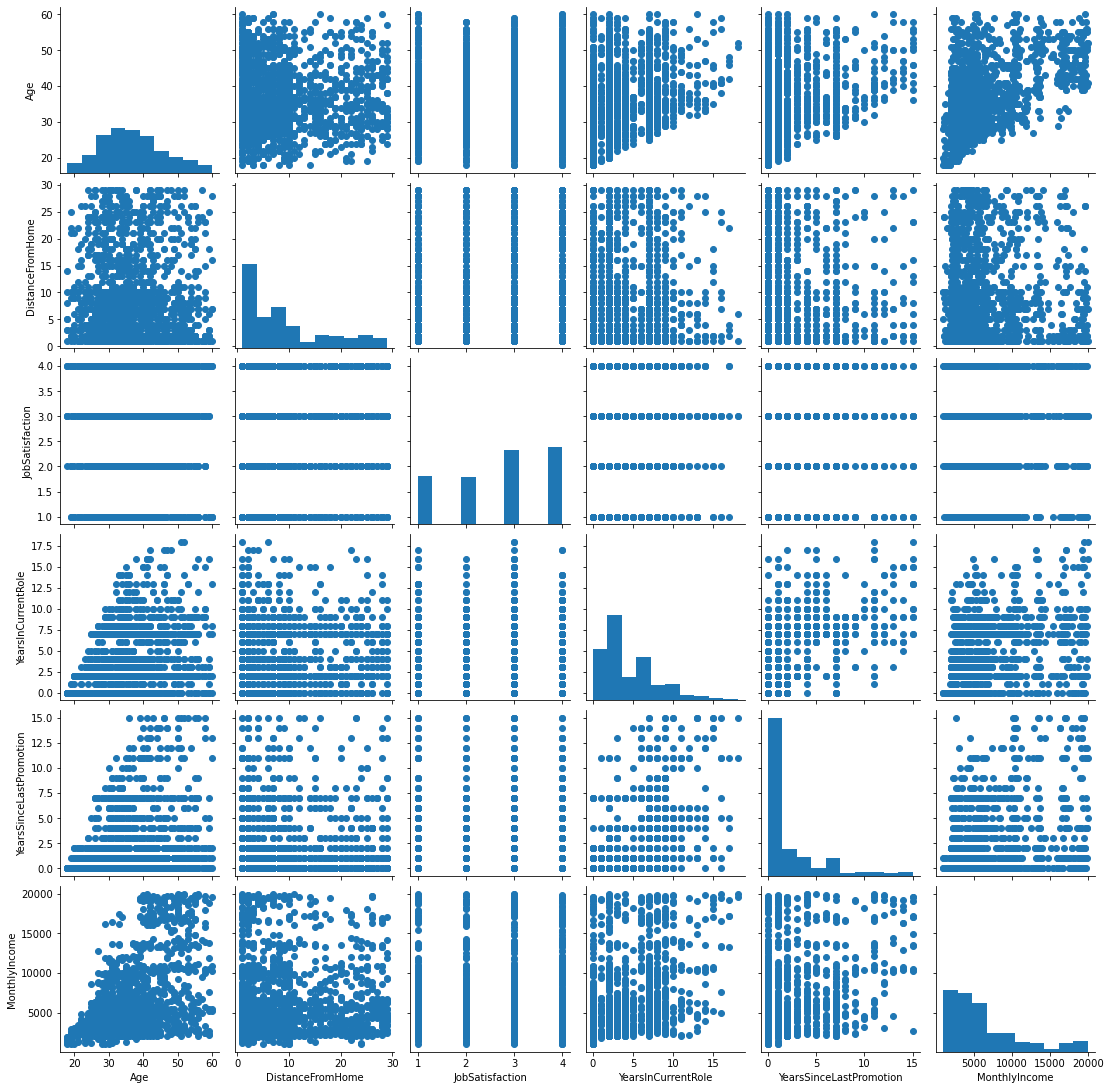

In [5]:
#Looking at all employees
lof =['Age', 'DistanceFromHome', 'JobSatisfaction', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'MonthlyIncome']
pg = plot_pairgrid(df_reduced, lof)

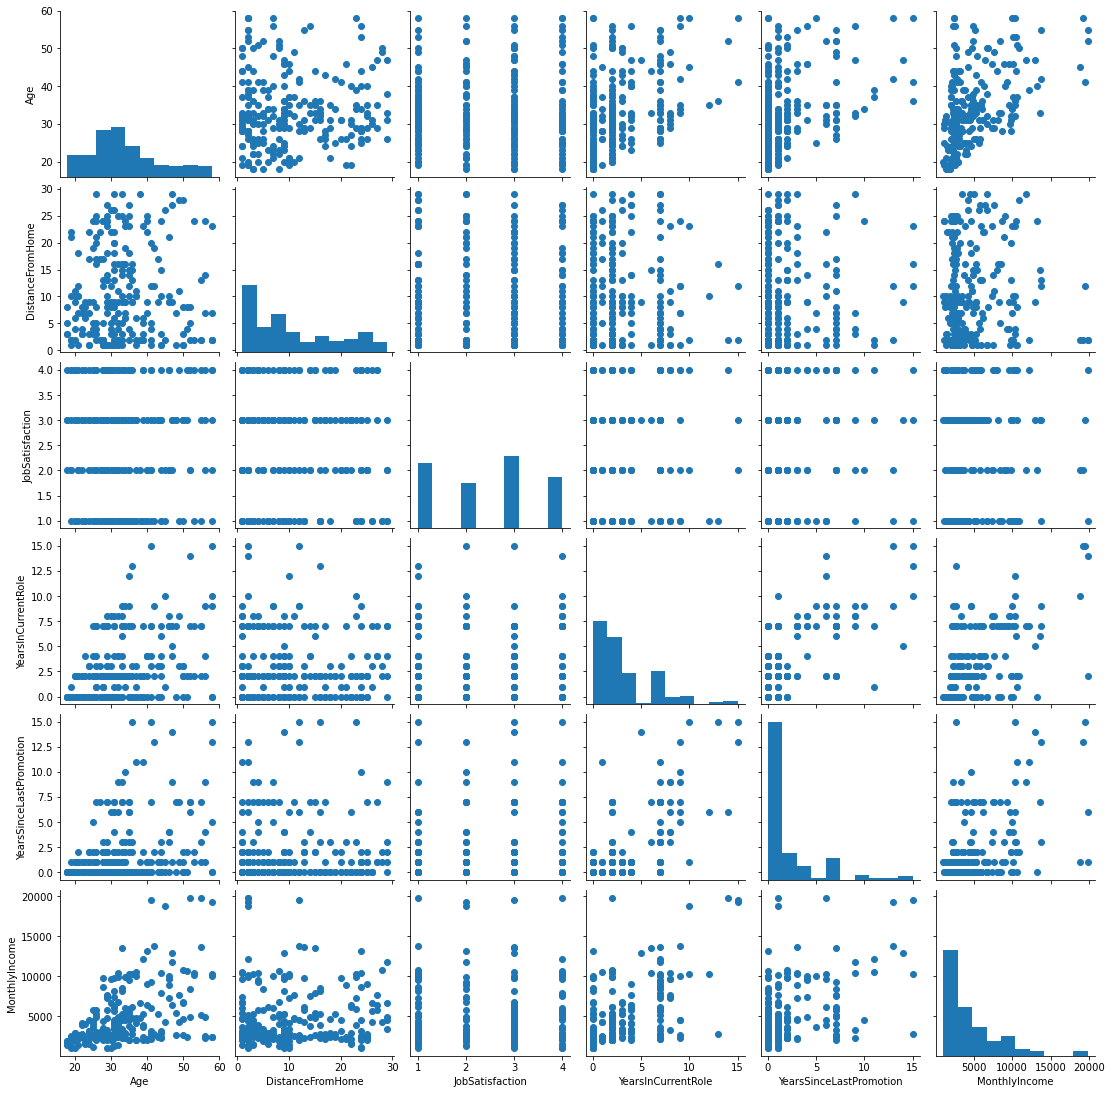

In [6]:
#Looking at only employees who left
df_attrition = df[df['Attrition'] == 'Yes']
df_attrition_reduced = df_attrition.loc[:, ['Age', 'DailyRate', 'DistanceFromHome', 'Education',
                      'EnvironmentSatisfaction', 'HourlyRate', 
                      'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
                      'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
                      'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
                      'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                      'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                      'YearsWithCurrManager']]
pg = plot_pairgrid(df_attrition_reduced, lof)

In [7]:
#It looks like the majority of employees who leave have lower monthly income relative to the 
#monthly income of all employees. 

#Additionally, it looks like the majority of employees who leave have been in their role for 0 to 2 years.

#Employees who leave are well balanced across all possible levels of "Job Satisfaction".

#Older employees seem to have a tendency to stay in their job level longer than
#those that have been in the company fewer years, perhaps due to the very fact that newer employees
#simply do not have enough time in the company to receive a promotion. This could also be due to employees with
#longer tenures in the company  are already in higher level positions where promotions are less frequent.

In [8]:
#Let's look at all correlations greater than 0.3 for people who have left the company
dup = []
for i in df_attrition_reduced:
    for j in df_attrition_reduced:
        if pearsonr(df_attrition_reduced[i], df_attrition_reduced[j])[0] > 0.5 and i != j:
            if (i+j) in dup:
                continue
            else:
                print('Correlation between', i, 'and', j, ' = ', pearsonr(df_attrition_reduced[i], df_attrition_reduced[j]))
                dup.append(i+j)
                dup.append(j+i)

Correlation between Age and MonthlyIncome  =  (0.5006022984011068, 1.948992713125973e-16)
Correlation between Age and TotalWorkingYears  =  (0.6726208658837578, 1.4245663709989722e-32)
Correlation between MonthlyIncome and TotalWorkingYears  =  (0.7422769898762984, 9.675396420479503e-43)
Correlation between MonthlyIncome and YearsAtCompany  =  (0.6349734675195277, 3.7251693408655912e-28)
Correlation between MonthlyIncome and YearsInCurrentRole  =  (0.5613862980437484, 4.414814708863345e-21)
Correlation between PercentSalaryHike and PerformanceRating  =  (0.7953371633641357, 5.291435001384817e-53)
Correlation between TotalWorkingYears and YearsAtCompany  =  (0.7674021418225675, 2.9358171094141646e-47)
Correlation between TotalWorkingYears and YearsInCurrentRole  =  (0.6213482174204024, 1.0553772474976118e-26)
Correlation between TotalWorkingYears and YearsSinceLastPromotion  =  (0.535387597471599, 5.579758733464364e-19)
Correlation between TotalWorkingYears and YearsWithCurrManager  =  

C:\Users\Martin\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


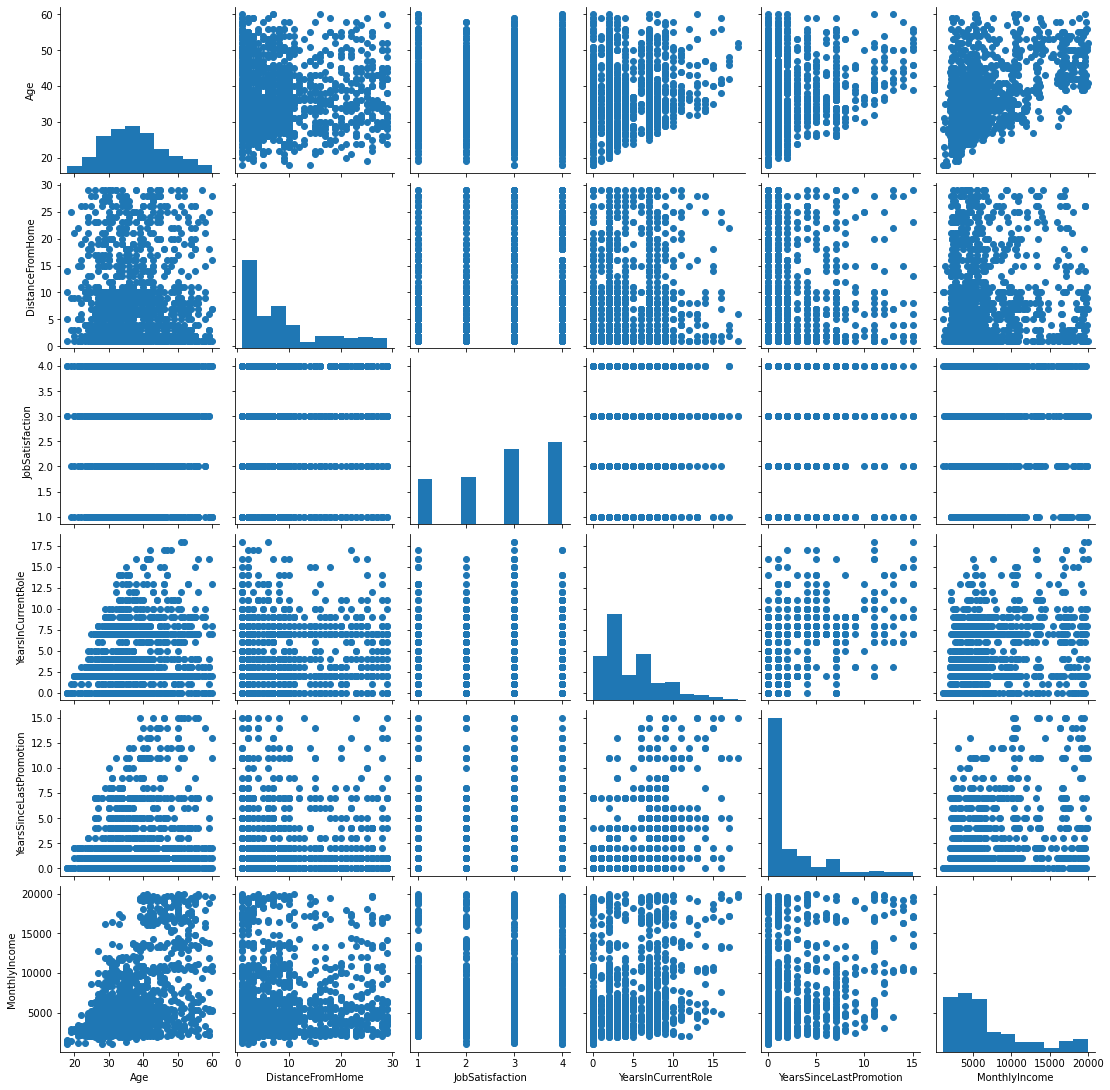

In [9]:
#Looking at employees who have not left
df_not_attrition = df[df['Attrition'] == 'No']
df_not_attrition_reduced = df_not_attrition.loc[:, ['Age', 'DailyRate', 'DistanceFromHome', 'Education',
                      'EnvironmentSatisfaction', 'HourlyRate', 
                      'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
                      'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
                      'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
                      'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                      'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                      'YearsWithCurrManager']]
pg = plot_pairgrid(df_not_attrition_reduced, lof)

In [10]:
#In contrast to employees who leave, monthly income for employees who stays is more balanced across possible monthly
#income levels. Where for employees who leave we found that there was a large proportion of employees on the lowest
#bins of monthly income, here for employees who stay, there are generally employees with larger monthly incomes.

#Also in contrast to employees who leave, where we found that Job Satisfaction was uniform across all four levels,
#it appears as though a larger proportion of employees who stay have a higher Job Satisfaction index.

#While for employees who left the company we found that there was a weak correlation between Age and YearsInCurrentRole,
#there appears to be almost no correlation for employees who stay

In [11]:
#Let's look at all correlations greater than 0.3 for people who have left the company
dup = []
for i in df_not_attrition_reduced:
    for j in df_not_attrition_reduced:
        if pearsonr(df_not_attrition_reduced[i], df_not_attrition_reduced[j])[0] > 0.5 and i != j:
            if (i+j) in dup:
                continue
            else:
                print('Correlation between', i, 'and', j, ' = ', pearsonr(df_not_attrition_reduced[i], df_not_attrition_reduced[j]))
                dup.append(i+j)
                dup.append(j+i)

Correlation between Age and TotalWorkingYears  =  (0.6727527963958985, 2.863103478082675e-163)
Correlation between MonthlyIncome and TotalWorkingYears  =  (0.7716382910867137, 3.7718111930772686e-244)
Correlation between PercentSalaryHike and PerformanceRating  =  (0.7693655617220849, 7.61869058665589e-242)
Correlation between TotalWorkingYears and YearsAtCompany  =  (0.5944686063998743, 1.0743618390873257e-118)
Correlation between YearsAtCompany and YearsInCurrentRole  =  (0.7450998340740913, 8.818911298314011e-219)
Correlation between YearsAtCompany and YearsSinceLastPromotion  =  (0.6049505473135757, 5.956895800143904e-124)
Correlation between YearsAtCompany and YearsWithCurrManager  =  (0.7643087802941977, 8.264797366086875e-237)
Correlation between YearsInCurrentRole and YearsSinceLastPromotion  =  (0.5277249276524292, 2.4001770886199956e-89)
Correlation between YearsInCurrentRole and YearsWithCurrManager  =  (0.696231498387575, 1.8481830982710346e-179)


## Agglomerative Clustering and Dendogram

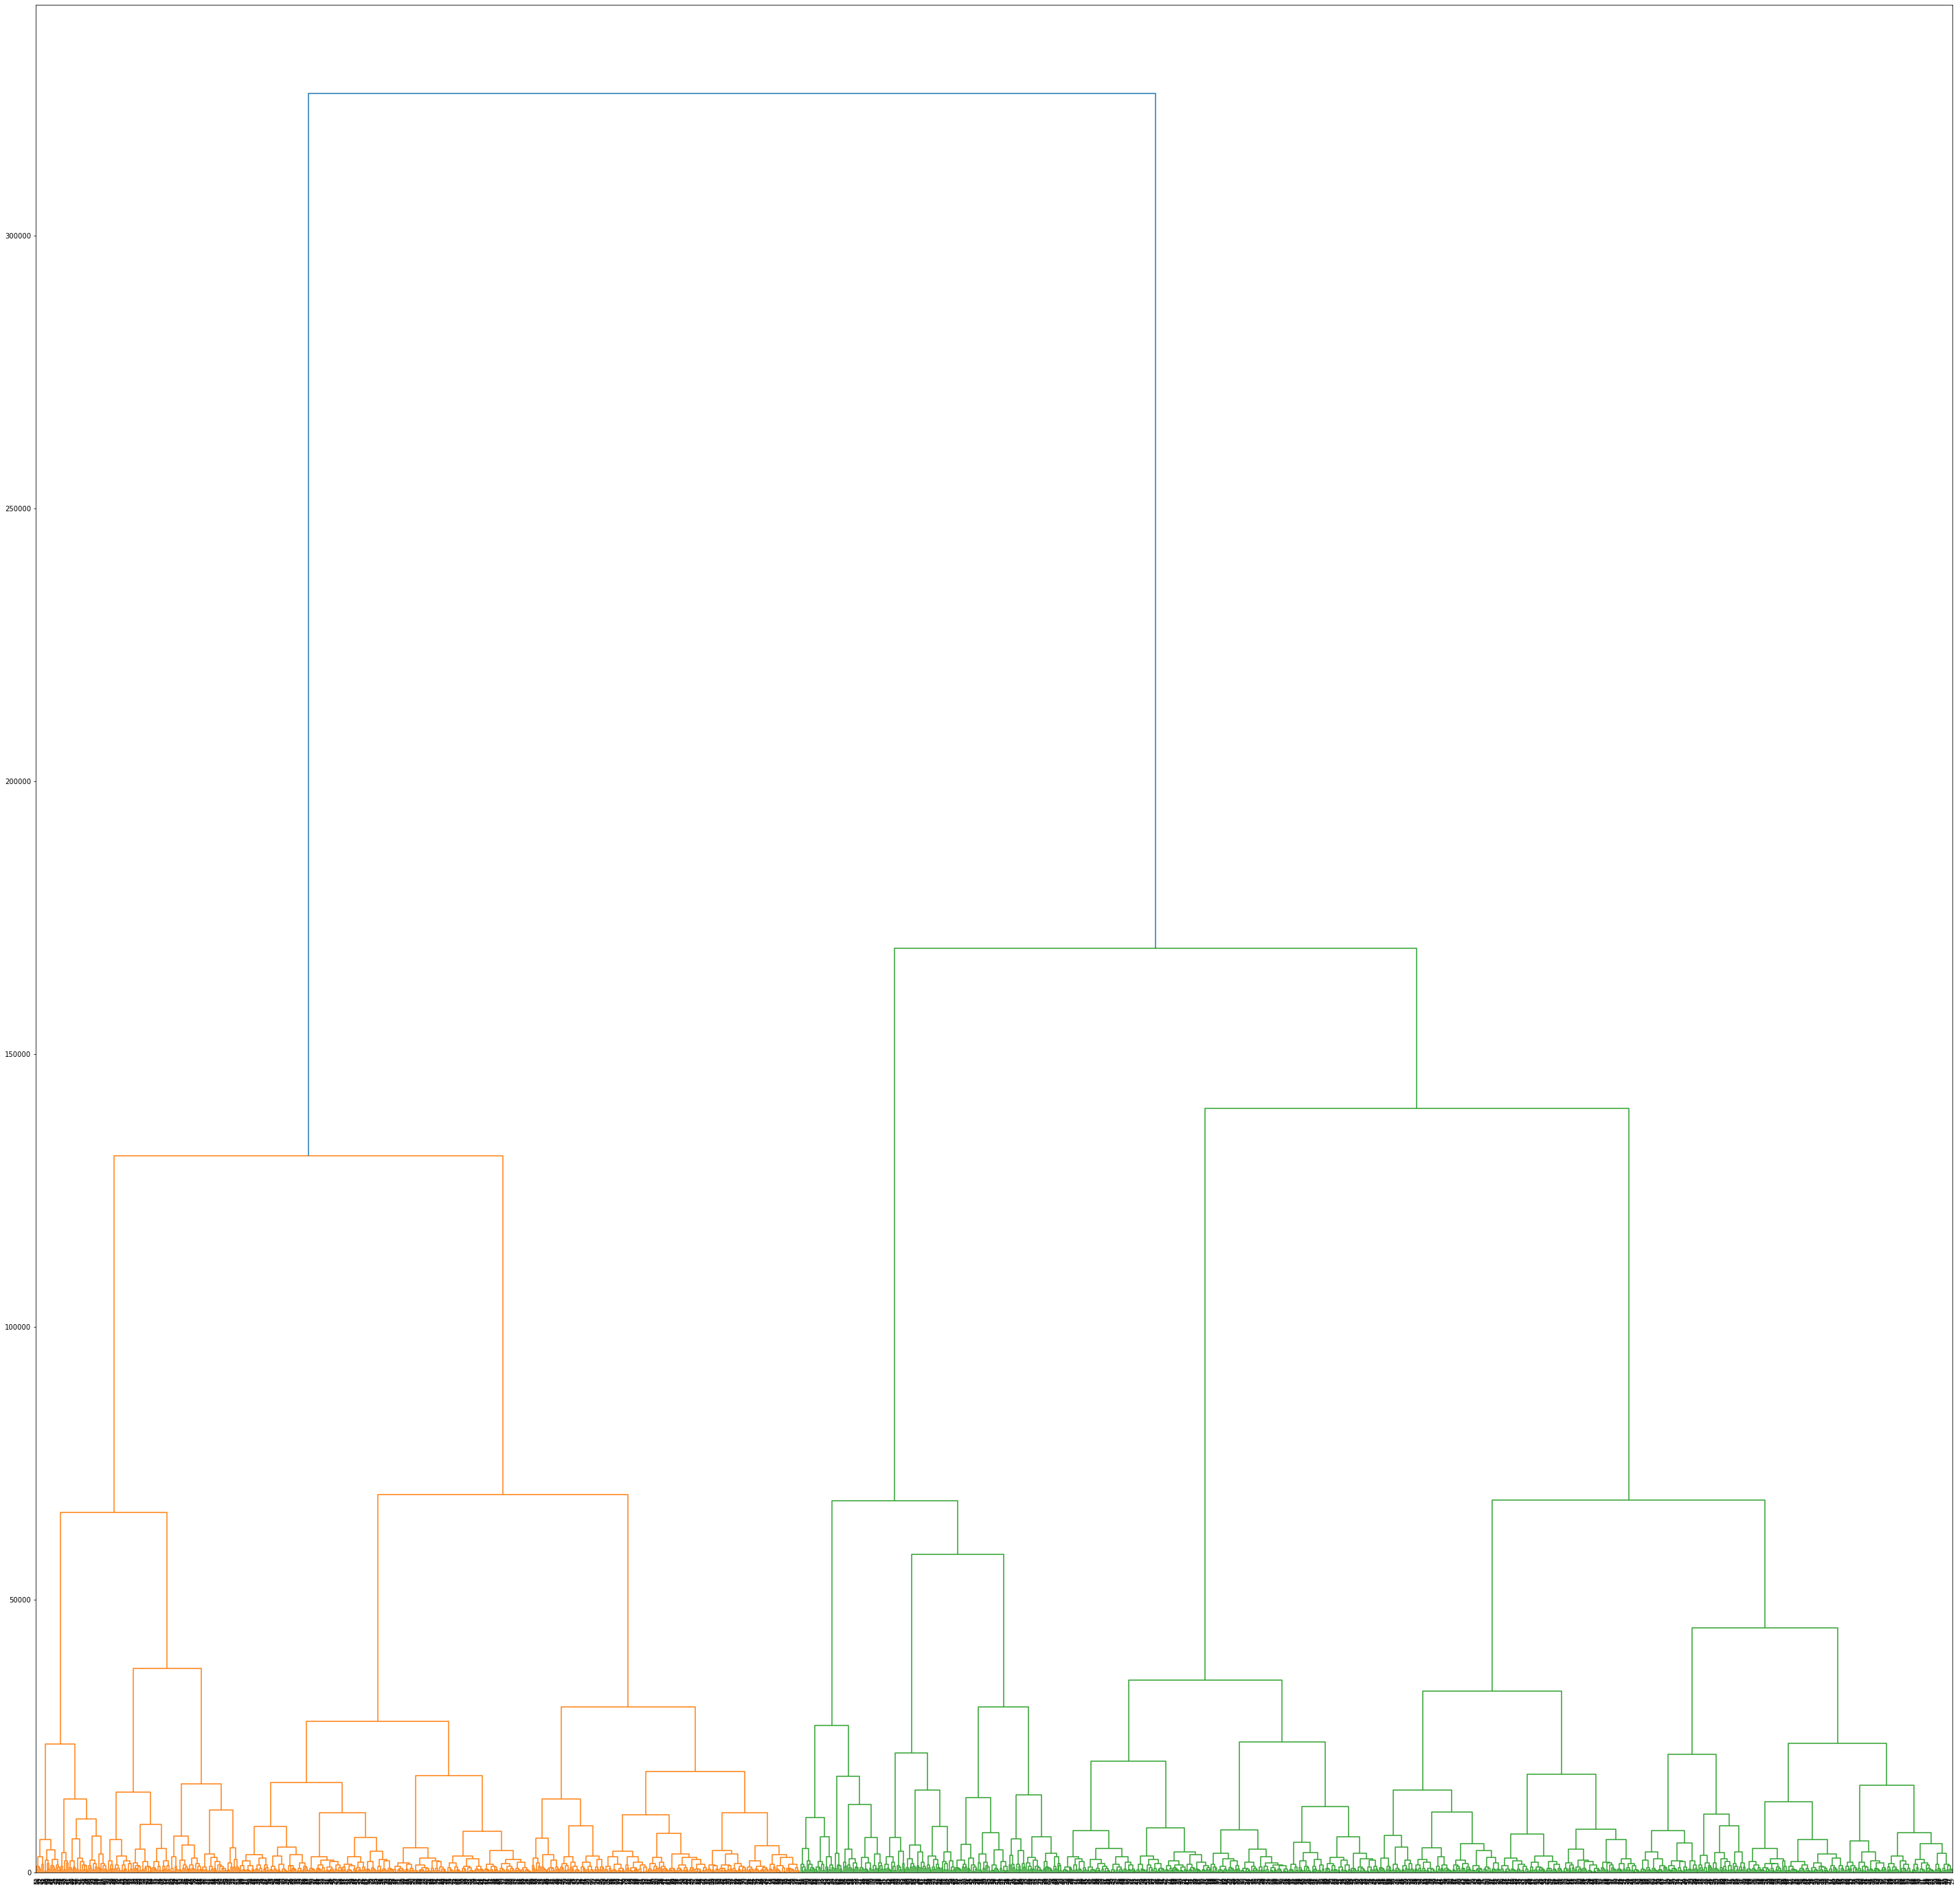

In [12]:
mergings = linkage(df_reduced, method='ward')#ward)

arr = list(df.iloc[:,0])
plt.figure(figsize=(50, 50))

dendrogram(
    mergings,
    labels=arr,
    leaf_rotation=90.,
    leaf_font_size=8
)
plt.show()

## PCA and t-SNE

In [13]:
def standardize(df):
    scaled = StandardScaler().fit_transform(df)
    return scaled

In [14]:
scaled = standardize(df_reduced)

In [15]:
pca = PCA(n_components = 22)
pca_result = pca.fit_transform(scaled)

In [16]:
def plot_scaled_variance(pca):
    var = pca.explained_variance_/sum(pca.explained_variance_)
    fig, ax = plt.subplots(figsize=(10,6))
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Dimension #')
    plt.title('Fraction of Explained Variance')

    plt.plot(var)   
    ax = plt.gca() 
    return ax

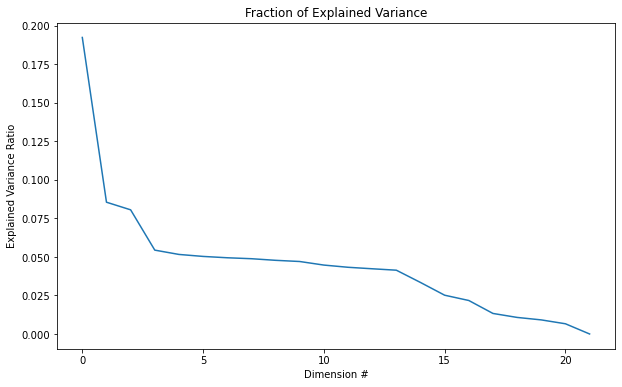

In [17]:
plot_scaled_variance(pca)

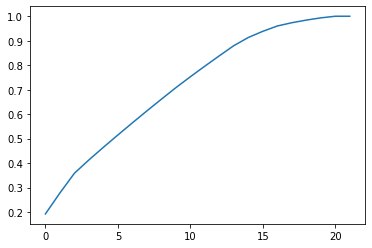

In [18]:
var = pca.explained_variance_ratio_.cumsum()
plt.plot(var)

In [19]:
#It looks like the first 14 components explain over 85% of the variance
var

array([0.19245891, 0.27798751, 0.35857019, 0.41299673, 0.46462402,
       0.5149608 , 0.56442991, 0.61328046, 0.66108927, 0.7081263 ,
       0.75284781, 0.79613911, 0.83846077, 0.87985753, 0.91328626,
       0.93844932, 0.96017928, 0.9735012 , 0.98424296, 0.99337959,
       1.        , 1.        ])

In [20]:
#Let's plot our first two components
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 

In [21]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate = 10)
tsne_results = tsne.fit_transform(df_reduced)
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

Text(0.5, 1.0, 't-SNE on Delta Dataset')

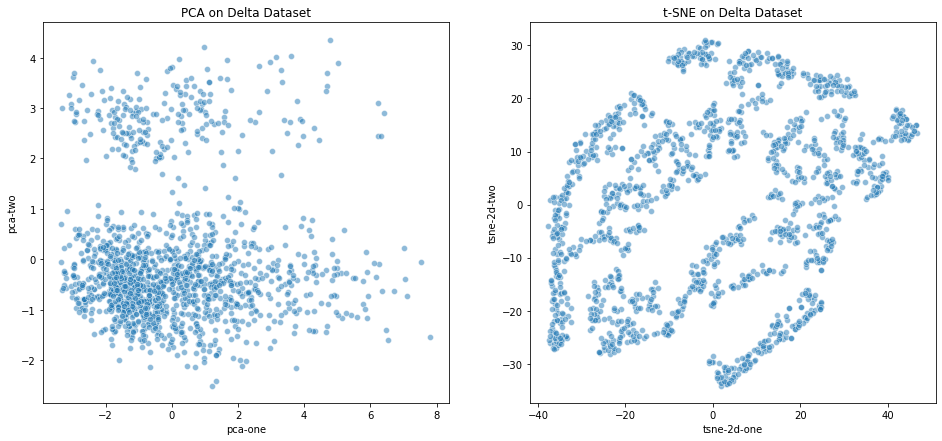

In [22]:
#May explore plotting the third component as well
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    #hue=df.index,
    #palette=sns.color_palette("hls", 44),
    data=df,
    legend="full",
    alpha=0.5,
    ax=ax1
)

plt.title("PCA on Delta Dataset")
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue=df.index,
    #palette=sns.color_palette("hls", 44),
    data=df,
    legend="full",
    alpha=0.5,
    ax=ax2
)
plt.title("t-SNE on Delta Dataset")